<a href="https://colab.research.google.com/github/gonzalezzayra/INVESTIGACION-DE-OPERACIONES/blob/main/PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Acciones correctivas en la línea de envasados de detergentes líquidos**

Descripción: Durante una auditoría interna trimestal realizada, se detectó un incremento del 5% en envases mal sellados de la línea de detergentes líquidos. Esto ha ocasionado devoluciones de producto y riesgo de pérdida de reputación de marca

**Unidad de tiempo: Días**

$$
\begin{array}{|l|c|c|c|}
\hline
\text{Actividad} & \text{Descripcion de la actividad} & \text{Predecesores inmediatos} & \text{Tiempo} \\
\hline
\text{A} & \text{Detectar la inconformidad} & \text{-} & \text{4 días} \\
\hline
\text{B} & \text{Retener productos} & \text{A} & \text{2 días}\\
\hline
\text{C} & \text{Revisar maquinaria} & \text{A,B} & \text{1 día}\\
\hline
\text{D} & \text{Revisar el trabajo del empleado a cargo de la maquinaria} & \text{C} & \text{1 día}\\
\hline
\text{E} & \text{Ajustar temperatura de la maquina} & \text{C,D} & \text{1 día}\\
\hline
\text{F} & \text{Implementar un checklist de mantenimiento} & \text{E} & \text{5 días}\\
\hline
\text{G} & \text{Capacitar al operador de la maquinaria} & \text{E,F} & \text{8 días}\\
\hline
\text{H} & \text{Monitoreo} & \text{F,G} & \text{14 días}\\
\hline
\text{I} & \text{Producto finalizado} & \text{H} & \text{} \\
\hline
\end{array}
$$


In [561]:
#Importar librerías
import networkx as nx
import matplotlib.pyplot as plt

In [562]:
#Se pone en una lista la tabla que se había puesto anteriormente
#Actividad/ Descripción/ Tiempo/ Predecesores
actividades = [
    ('A', 'Detectar inconformidad', 4, []),
    ('B', 'Retener productos', 2, ['A']),
    ('C', 'Revisar maquinaria', 1, ['A', 'B']),
    ('D', 'Revisar trabajo del empleado a cargo de la maquinaria', 1, ['C']),
    ('E', 'Ajustar temperatura de la maquina', 1, ['C', 'D']),
    ('F', 'Implementar un checklist de mantenimiento', 5, ['E']),
    ('G', 'Capacitar al operador de la maquinaria', 8, ['E', 'F']),
    ('H', 'Monitoreo', 14, ['F', 'G']),
    ('I', 'Producto finalizado', 0, ['H'])
]

In [563]:
#Definir el grafo dirigido
G = nx.DiGraph()

In [564]:
#Se recorre la lista de actividades para los puntos que se deben de poner en el grafo
for t_act, descripcion, tiempo, predecesores in actividades:
    #Se añade el nodo junto con su duración
    G.add_node(t_act, duration=tiempo)

#Se recorre la lista para los arcos
for t_act, descripcion, duracion, predecesores in actividades:
    #Para cada actividad hay predecesores
    for predecesor in predecesores:
        #Del predecesor hacia la actividad actual se añade un arco
        G.add_edge(predecesor, t_act)

In [565]:
#Calcular ruta crítica

#Se define el nodo inicial y el final, como la primera actividad y la última actividad
nodo_inicial = 'A'
nodo_final = 'I'

#Lista para la ruta crítica
ruta_critica = []
duracion_maxima = 0 #duración máxima que nos servirá de contador

#Se buscan todos las caminos posibles desde la primera actividad hasta la última actividad
for camino in nx.all_simple_paths(G, source=nodo_inicial, target=nodo_final):

    #Se suma para cada camino cada una de las actividades
    duracion_actual = sum(G.nodes[actividad]['duration'] for actividad in camino)

    #Se va evaluando si la suma de este camino es mayor que la anterior, paar ir descartando
    if duracion_actual > duracion_maxima:
        #Hasta que la duración máxima sea igual a la que se tiene actualmente
        duracion_maxima = duracion_actual
        ruta_critica = camino

#Entonces igualamos, la duración máxima es igual a la total
distancia_total = duracion_maxima

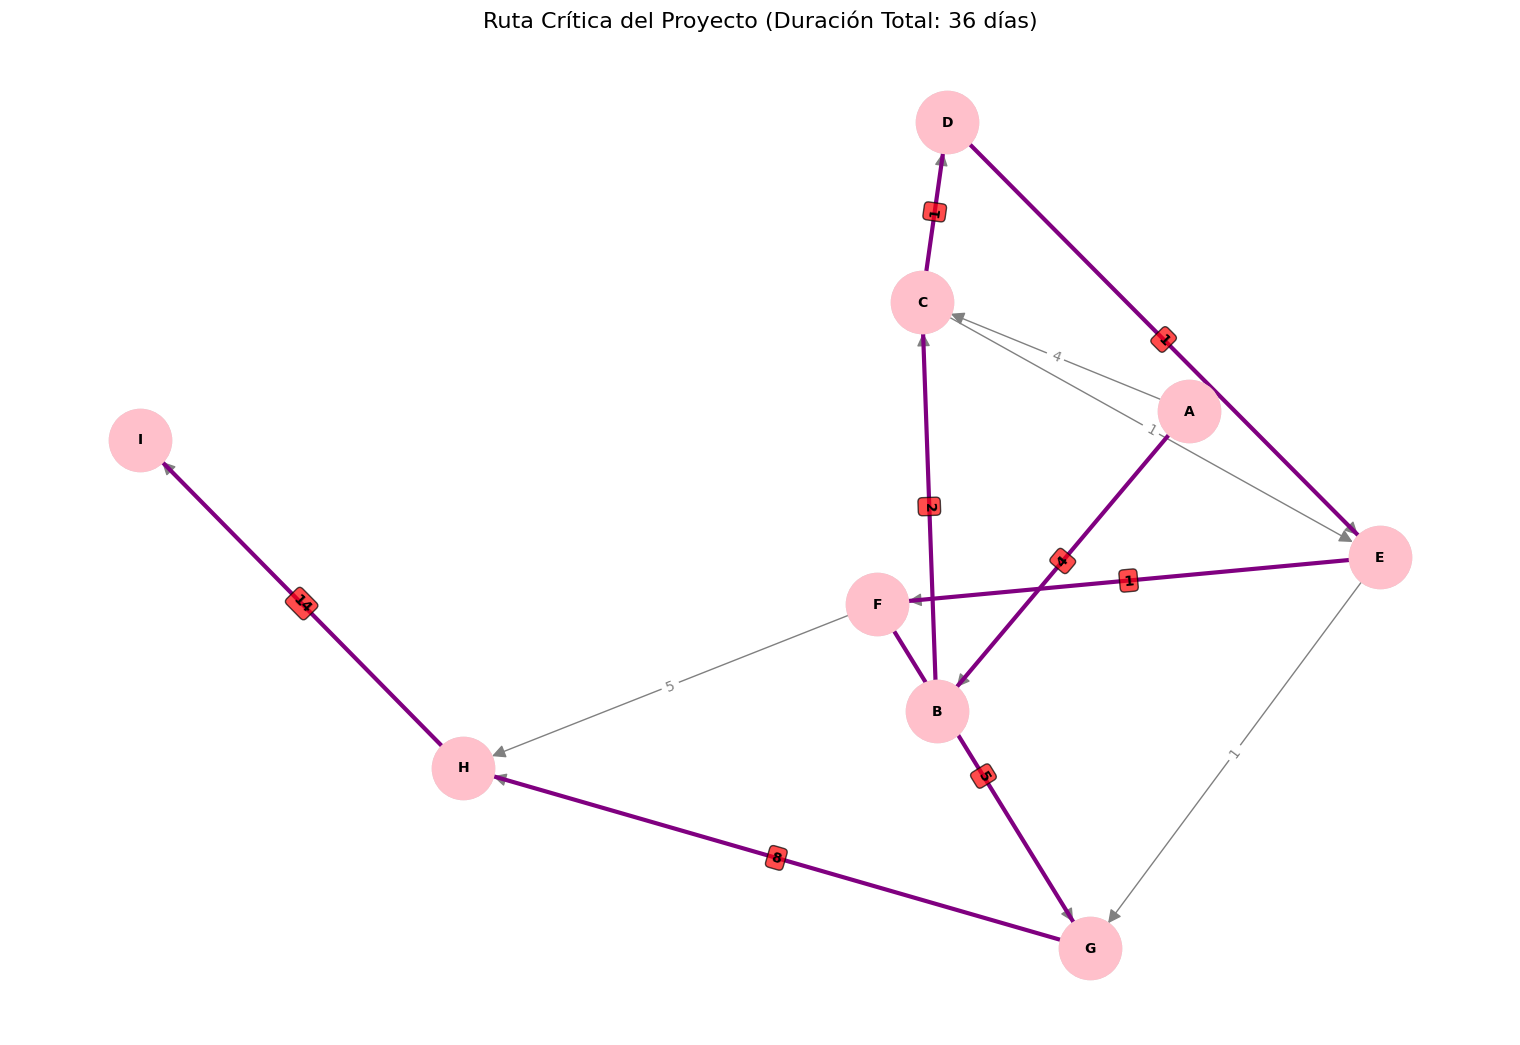

La ruta crítica es:  A -> B -> C -> D -> E -> F -> G -> H -> I
La distancia estimada de la ruta crítica es:  36 días


In [566]:
#Para graficar el Grafo, con más detalle

# Esto calcula posiciones "bonitas" para los puntos y las guarda para que no cambien.
#Calcula y guarda las posiciones
posicion = nx.spring_layout(G, seed=42, k=0.9, iterations=50)

#Se crean las etiquetas que están en los arcos
etiquetas = { (u, v): f"{G.nodes[u]['duration']}" for u, v in G.edges() }

#Aquí es donde empieza para ir marcando la ruta crítica, para eso es la lista de flechas
#El zip es para crear los pares de los nodos
l = list(zip(ruta_critica, ruta_critica[1:]))

#Definir el tamaño de figura
plt.figure(figsize=(15, 10), facecolor='white')

#Se tiene que hacer por capas

#Primera capa
nx.draw(G, posicion, with_labels=True, node_color='lightgray', node_size=2000,
        font_size=10, font_weight='bold', edge_color='gray', width=1,
        arrows=True, arrowsize=20)
nx.draw_networkx_edge_labels(G, posicion, edge_labels= etiquetas, font_color='gray')
#Tanto los nodos como los arcos son grises, para que la capa de la ruta crítica se vea

#Segunda capa
#Se dibujan los nodos de color rosa, los de la ruta critica
nx.draw_networkx_nodes(G, posicion, nodelist=ruta_critica, node_color='pink', node_size=2000)

#Se dibujan los arcos de color morado
nx.draw_networkx_edges(G, posicion, edgelist=l, edge_color='purple', width=3, arrows=True, arrowsize=20)

#Se crean las etiquetas de los arcos para la ruta crítica
edge_labels_ruta = {edge: etiquetas[edge] for edge in l}
nx.draw_networkx_edge_labels(G, posicion, edge_labels=edge_labels_ruta, font_color='black',
                             font_weight='bold' ,
                             bbox={"boxstyle": "round,pad=0.3", "fc": "red", "alpha": 0.7})


#Título del grafo y duración de la ruta
plt.title(f"Ruta Crítica del Proyecto (Duración Total: {distancia_total} días)", fontsize=16)
plt.show()

#Se imprimen la ruta critica y la distancia estimada
print("La ruta crítica es: ", " -> ".join(ruta_critica))
print("La distancia estimada de la ruta crítica es: ", distancia_total, "días")

Como una forma de verificar se realizó el ejercicio a mano y se confirma lo que nos dió en el código.

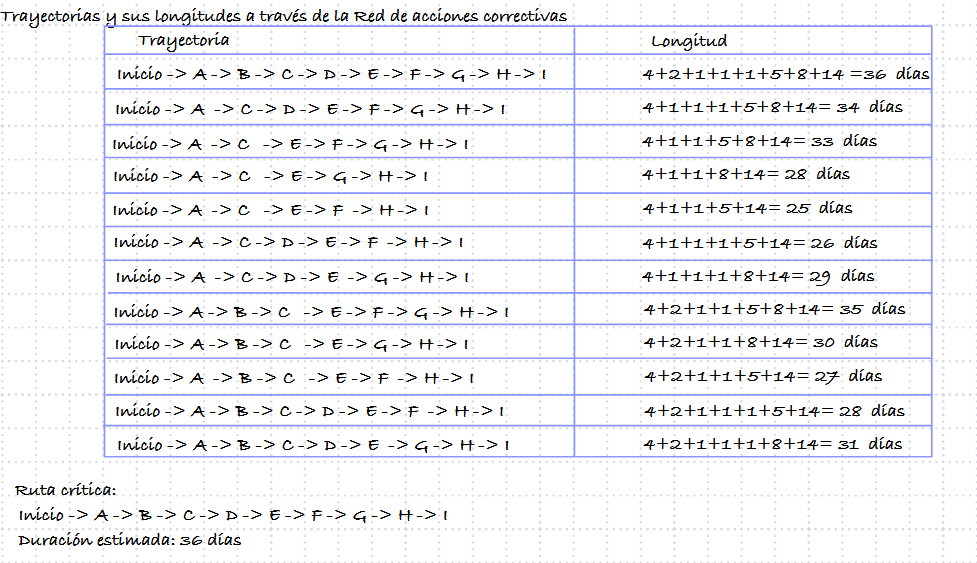

***Utilizando herramientas antes utilizadas en el curso, tratando de adaptar el problema anterior***

Para optimizar el tiempo de resolución del problema ocupamos el método de la ruta más corta

Se instala

```
!pip install graphviz pydot
```
para que se vea mejor el grafo y se pueda visualizar por completo

In [567]:
!pip install graphviz pydot

In [568]:
#Importar librerias, aunque ya lo estaban antes excepto graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

In [569]:
#Definir el grafo
G = nx.Graph()

#Se añaden los arcos que levan de un nodo a otro, se pone la capacity para cada uno de ellos
G.add_edge('A', 'B', capacity=4)
G.add_edge('A', 'C', capacity=4)
G.add_edge('B', 'C', capacity=2)
G.add_edge('C', 'D', capacity=1)
G.add_edge('C', 'E', capacity=1)
G.add_edge('D', 'E', capacity=1)
G.add_edge('E', 'F', capacity=1)
G.add_edge('E', 'G', capacity=1)
G.add_edge('F', 'H', capacity=5)
G.add_edge('F', 'G', capacity=5)
G.add_edge('G', 'H', capacity=8)
G.add_edge('H', 'I', capacity=14)

In [570]:
#Calcular la ruta más corta
nodo_inicial = 'A'
nodo_final = 'I'

#Es para ver la ruta más corta, con el metodo de dijkstra
ruta_corta = nx.shortest_path(G, source=nodo_inicial, target=nodo_final, weight='capacity', method='dijkstra')
print(ruta_corta) #Devuelve la lista con la ruta más corta

#Para calcular la distancia de la ruta más corta
distancia_corta = nx.shortest_path_length(G, source=nodo_inicial, target=nodo_final, weight='capacity', method='dijkstra')

['A', 'C', 'E', 'F', 'H', 'I']


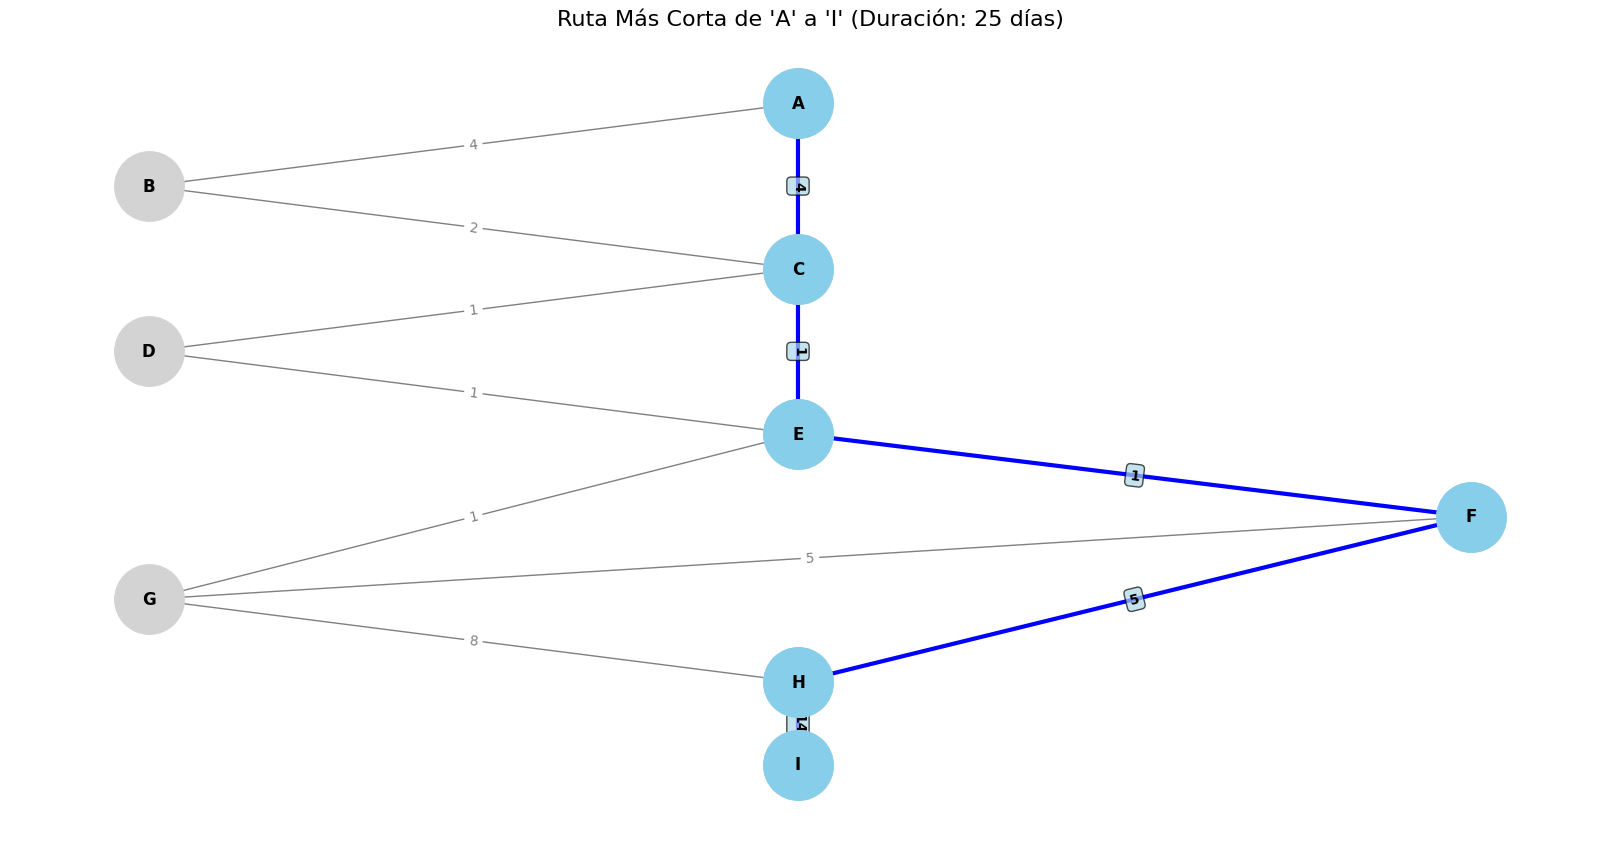

La ruta más corta es:  A -> C -> E -> F -> H -> I
La duración de la ruta más corta es:  25


In [571]:
#Para dibujar el grafo con más detalle
posicion = graphviz_layout(G, prog='dot') #Es para el grafo se vea más ordenado

#Se obtienen para las etiquetas de la parte de 'capacity'
etiquetas = nx.get_edge_attributes(G, 'capacity')

#Esto es para tener la lista de los arcos, de donde van
l = list(zip(ruta_corta, ruta_corta[1:]))

#Se configura el tamaño del grafo
plt.figure(figsize=(16, 8), facecolor='white')

#Se tiene que hacer por capas
#Primera capa
nx.draw(G, posicion,
        with_labels=True,
        node_color='lightgray',
        node_size=2500,
        font_size=12,
        font_weight='bold',
        edge_color='gray',
        width=1,
        arrows=True,
        arrowsize=20)
nx.draw_networkx_edge_labels(G, posicion, edge_labels=etiquetas, font_color='gray')
#Tanto los nodos como los arcos son grises, para que se puedan visualizar en la segunda capa

#Segunda capa
#Se dibujan los nodos de color azul claro para los de la ruta más corta
nx.draw_networkx_nodes(G, posicion,
                       nodelist=ruta_corta,
                       node_color='skyblue',
                       node_size=2500)

#Se dibujan los arcos  de color azul
nx.draw_networkx_edges(G, posicion,
                       edgelist=l,
                       edge_color='blue',
                       width=3,
                       arrows=True,
                       arrowsize=20)
#Se crean las etiquetas de los arcos de la ruta crítica
edge_labels_ruta = {edge: etiquetas[edge] for edge in l}
nx.draw_networkx_edge_labels(G, posicion,
                             edge_labels=edge_labels_ruta,
                             font_color='black',
                             font_weight='bold',
                             bbox={"boxstyle": "round,pad=0.3", "fc": "lightblue", "alpha": 0.7})

#Título del grafo y duración total de la ruta más corta
plt.title(f"Ruta Más Corta de '{nodo_inicial}' a '{nodo_final}' (Duración: {distancia_corta} días)", fontsize=16)
plt.show()

#Se imprime la ruta más corta y la duración total
print("La ruta más corta es: ", " -> ".join(ruta_corta))
print("La duración de la ruta más corta es: ", distancia_corta)

Se realizó el ejercicio a mano y se verifica lo que nos dio el código

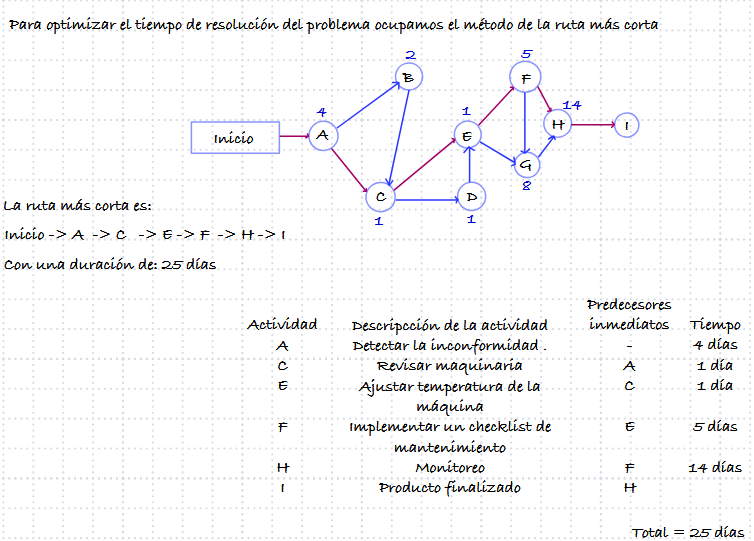



**Árbol de expansión mínima**

In [572]:
#Importar librerias
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

In [573]:
#Definir el grafo
G = nx.Graph()

#Se añaden los arcos que llevan de un nodo a otro
G.add_edge('A', 'B', capacity=4)
G.add_edge('A', 'C', capacity=4)
G.add_edge('B', 'C', capacity=2)
G.add_edge('C', 'D', capacity=1)
G.add_edge('C', 'E', capacity=1)
G.add_edge('D', 'E', capacity=1)
G.add_edge('E', 'F', capacity=1)
G.add_edge('E', 'G', capacity=1)
G.add_edge('F', 'H', capacity=5)
G.add_edge('F', 'G', capacity=5)
G.add_edge('G', 'H', capacity=8)
G.add_edge('H', 'I', capacity=14)

In [574]:
#Para calcular el árbol de expansión mínima
arbol_expansion_minima = nx.minimum_spanning_tree(G, weight='capacity')
duracion_total = MST.size(weight='capacity')

In [575]:
#Para dibujar el grafo, para que este más detallado
posicion = graphviz_layout(G, prog='neato')
edge_labels_raw = nx.get_edge_attributes(G, 'capacity') #Extrae de capacity la duración de los arcos del grafo
#El zip crea los pares de los nodos
lista_arcos_mst = list(MST.edges())
#print(lista_arcos_mst)

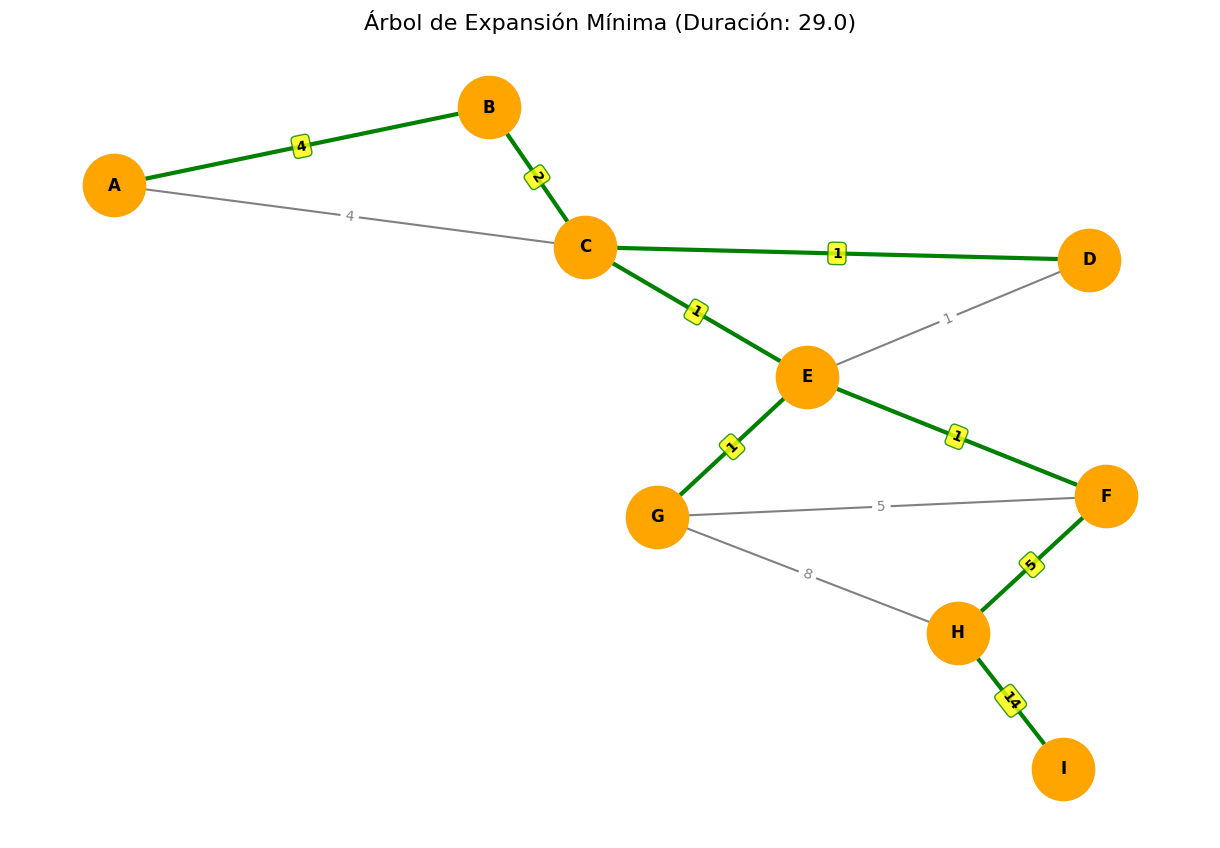

La duración total del árbol de expansión es: 29.0


In [576]:
#Se define el tamaño de la figura
plt.figure(figsize=(12, 8), facecolor='white')

#Primera capa
nx.draw(G, posicion, with_labels=True, node_color='lightgray', node_size=2000,
        font_weight='bold', edge_color='gray', width=1.5)
nx.draw_networkx_edge_labels(G, posicion, edge_labels=edge_labels_raw, font_color='gray')

#Segunda capa
nx.draw_networkx_nodes(G, posicion, nodelist=G.nodes(), node_color='orange', node_size=2000)
nx.draw_networkx_edges(G, posicion, edgelist=lista_arcos_mst, edge_color='green', width=3)
edge_labels_ruta = {edge: edge_labels_raw[edge] for edge in lista_arcos_mst}
nx.draw_networkx_edge_labels(G, posicion, edge_labels=edge_labels_ruta, font_color='black',
                             font_weight='bold', bbox={"boxstyle": "round,pad=0.3", "fc": "yellow", "ec": "green", "lw": 1, "alpha": 0.8})

#Titulo del grafo y duración total
plt.title(f"Árbol de Expansión Mínima (Duración: {duracion_total})", fontsize=16)
plt.show()
#Se imprime lo que antes se había calculado, la duración total
print(f"La duración total del árbol de expansión es: {duracion_total}")